# Analyse et prétraitement des données

In [ ]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Données statiques

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

Importer le jeu de données

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Dataset1.csv')

Visualiser le contenu

In [ ]:
df.head(10)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


description globale du dataset.

In [ ]:
df.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB


In [ ]:
df.shape

(885, 14)

In [ ]:
valeurs_nulles = df.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

N            0
P            0
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64

In [ ]:
def Met_En_nan(df):
    df['P'] = pd.to_numeric(df['P'], errors='coerce')  # 'coerce' convertira les valeurs non numériques en NaN
    df['Cu'] = pd.to_numeric(df['Cu'], errors='coerce')  # 'coerce' convertira les valeurs non numériques en NaN
    df['OC'] = pd.to_numeric(df['OC'], errors='coerce')  # 'coerce' convertira les valeurs non numériques en NaN

Met_En_nan(df)

In [ ]:
for c in df.columns:
  l = len(df[c].unique())
  print(c,'=>', l)

N => 61
P => 93
K => 63
pH => 107
EC => 71
OC => 69
S => 153
Zn => 70
Fe => 387
Cu => 167
Mn => 429
B => 127
OM => 68
Fertility => 3


Calculer les mesures de tendance centrale et en déduire les symétries

In [ ]:
def calculer_quartiles(attribut):
    # Trier l'attribut
    attribut_trie = sorted(attribut)

    # Calculer (Q0) qui est le min
    Q0 = attribut_trie[0]

    # Calculer le premier quartile (Q1)
    n = len(attribut_trie)
    q1_idx = n // 4
    Q1 = (attribut_trie[q1_idx - 1] + attribut_trie[q1_idx]) / 2

    # Calculer le deuxième quartile (Q2, la médiane)
    if n % 2 == 1:
        Q2 = attribut_trie[n // 2]
    else:
        mid_idx = n // 2
        Q2 = (attribut_trie[mid_idx - 1] + attribut_trie[mid_idx]) / 2

    # Calculer le troisième quartile (Q3)
    q3_idx = (3 * n) // 4
    Q3 = (attribut_trie[q3_idx - 1] + attribut_trie[q3_idx]) / 2

    # Calculer le quatrième quartile (Q4)
    q4_idx = n - q1_idx
    Q4 = (attribut_trie[q4_idx - 1] + attribut_trie[q4_idx]) / 2


    return Q0, Q1, Q2, Q3, Q4


In [ ]:
def Moyenne(tab):
    s = sum(tab)
    m = len(tab)
    return s/m

def Mediane(tab):
    liste_entiers_triee = sorted(tab)

    n = len(liste_entiers_triee)
    if n % 2 == 1:
        # Si la liste a une longueur impaire, la médiane est au milieu
        mediane = liste_entiers_triee[n // 2]
    else:
        # Si la liste a une longueur paire, la médiane est la moyenne des deux éléments du milieu
        mediane = (liste_entiers_triee[(n - 1) // 2] + liste_entiers_triee[n // 2]) / 2
    return mediane

def Mode(tab):
    occurrences = {}
    for valeur in tab:
        if valeur in occurrences:
            occurrences[valeur] += 1
        else:
            occurrences[valeur] = 1

    mode = None
    max_occurrences = 0

    for valeur, count in occurrences.items():
        if count > max_occurrences:
            mode = valeur
            max_occurrences = count
    return mode


In [ ]:
def calculer_mesure(df):
    col = df.columns
    table = PrettyTable()
    table.field_names = ["Attribut", "Moyenne", "Médiane", "Mode", "Max", "Min", "q0", "q1", "q2", "q3", "q4"]

    for c in col:
        moyenne = round(df[c].mean(),2)
        mediane = round(Mediane(df[c]),2)
        mode = round(Mode(df[c]),2)  # Get the first mode if it exists
        max_val = df[c].max()
        min_val = df[c].min()
        q0, q1, q2, q3, q4 = calculer_quartiles(df[c])
        table.add_row([c, moyenne, mediane, mode, max_val, min_val, q0, q1, q2, round(q3,2), round(q4,2)])
    return table
T = calculer_mesure(df)
T

Attribut,Moyenne,Médiane,Mode,Max,Min,q0,q1,q2,q3,q4
N,247.0,257,207,383,6,6,201.0,257,307.0,307.0
P,14.56,7.5,8.3,125.0,2.9,2.9,12.4,7.5,10.6,10.7
K,501.34,475,444,1560,11,11,412.0,475,581.0,581.0
pH,7.51,7.5,7.5,11.15,0.9,0.9,7.35,7.5,7.63,7.63
EC,0.54,0.55,0.62,0.95,0.1,0.1,0.43,0.55,0.64,0.64
OC,0.62,0.68,0.88,24.0,0.1,0.1,0.39,0.68,1.07,1.07
S,7.55,6.64,5.13,31.0,0.64,0.64,4.7,6.64,8.75,8.75
Zn,0.47,0.36,0.28,42.0,0.07,0.07,0.28,0.36,0.47,0.47
Fe,4.13,3.56,6.32,44.0,0.21,0.21,2.035,3.56,6.31,6.32
Cu,0.95,0.93,1.25,3.02,0.09,0.09,0.63,0.93,1.25,1.25


<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


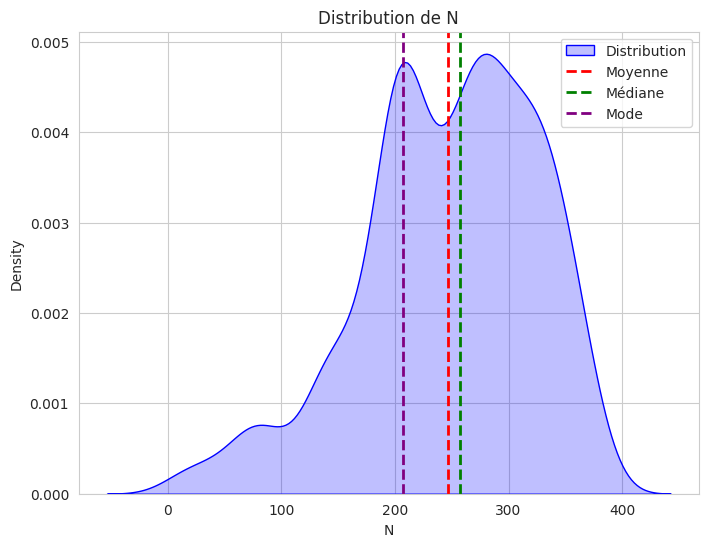

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


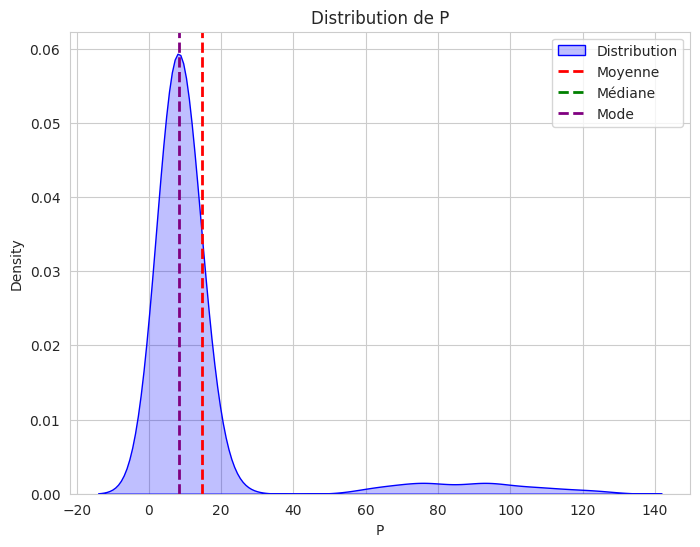

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


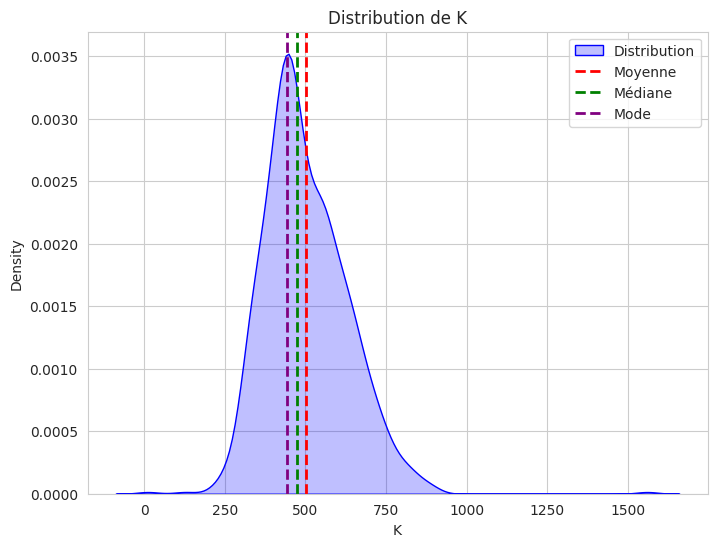

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


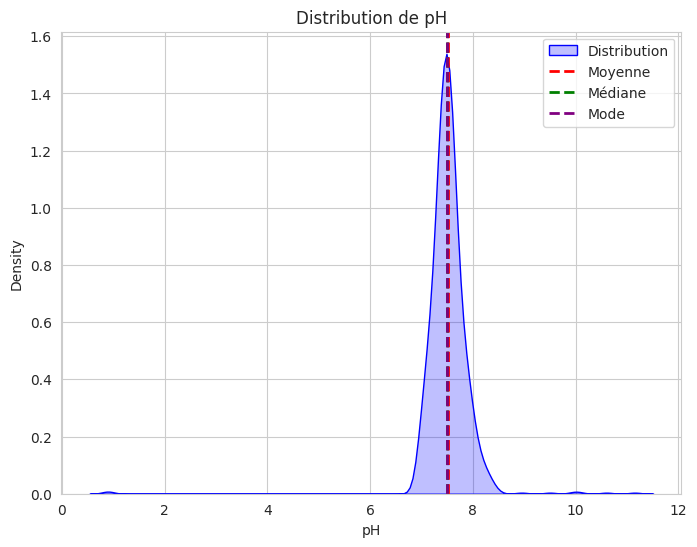

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


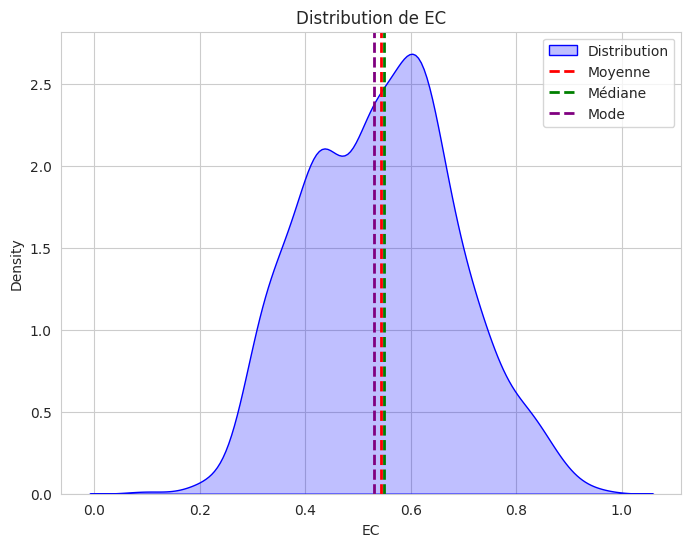

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


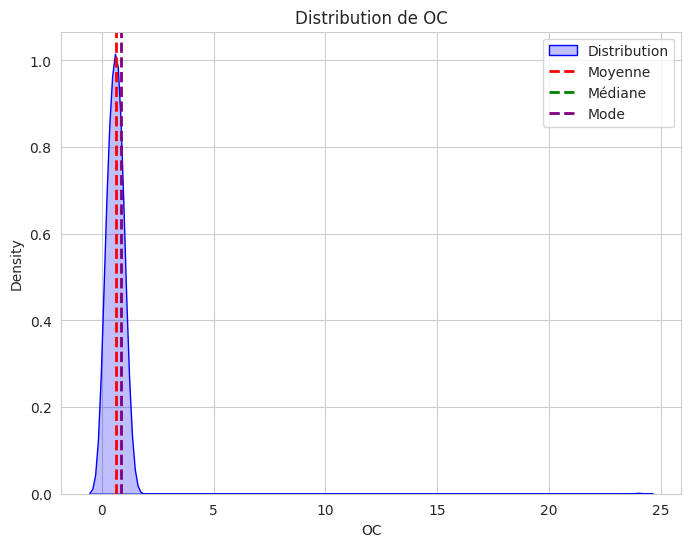

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


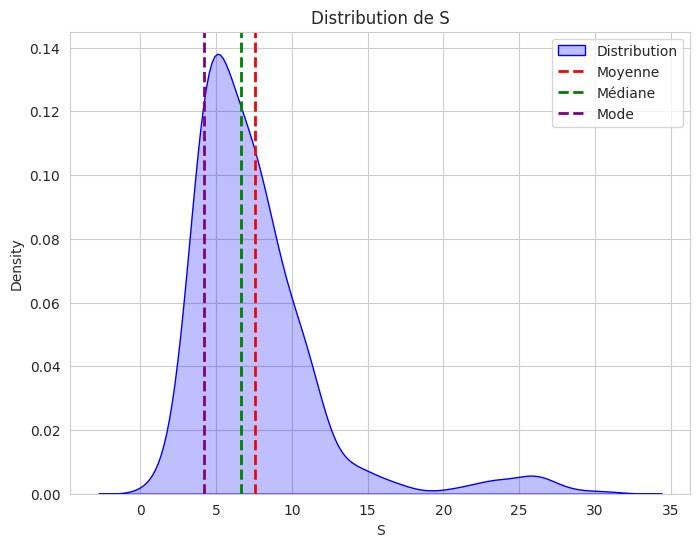

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


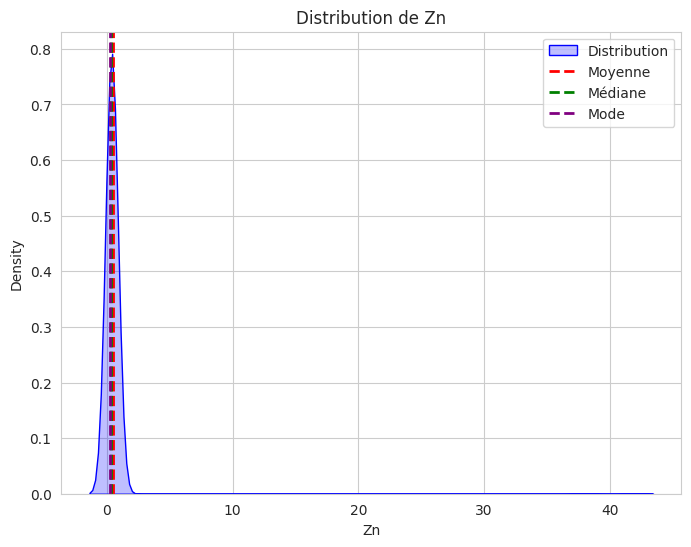

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


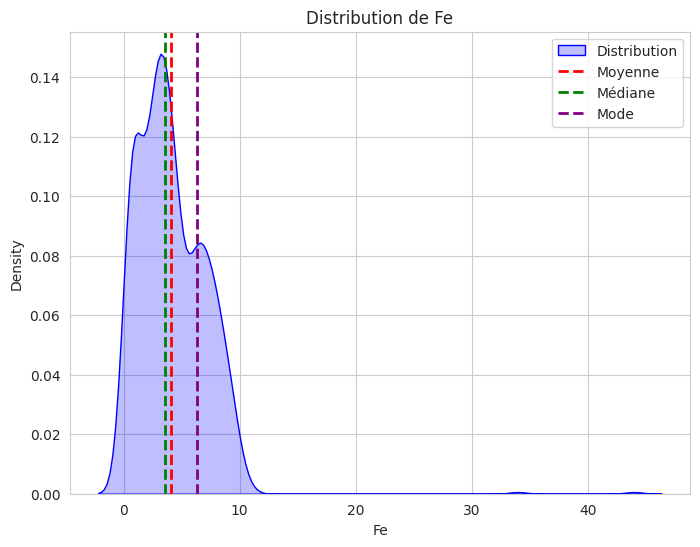

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


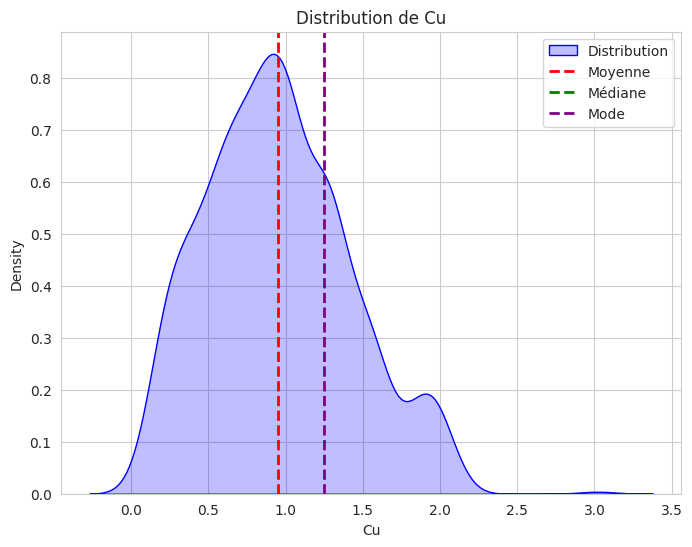

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


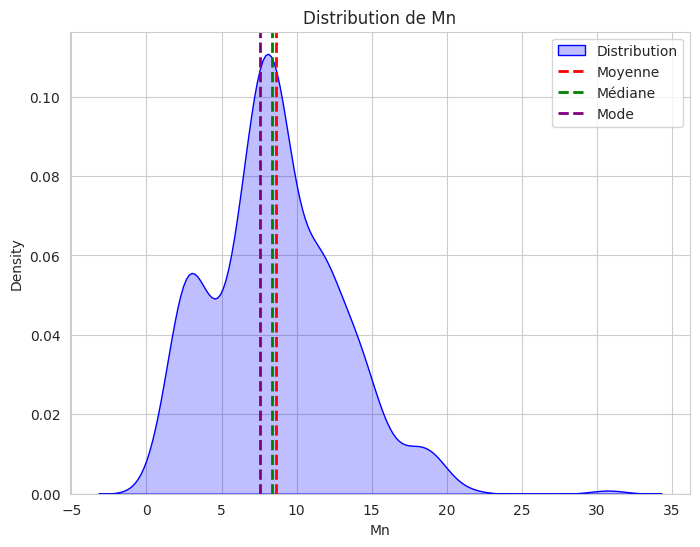

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


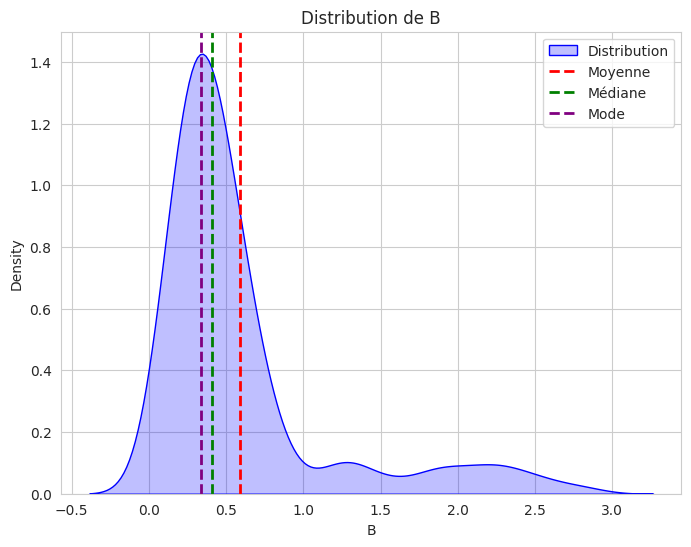

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


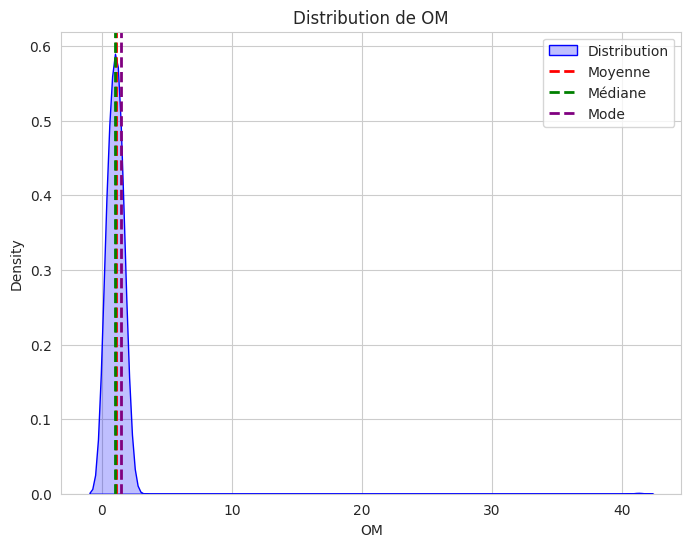

<ipython-input-16-d56341569bc9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


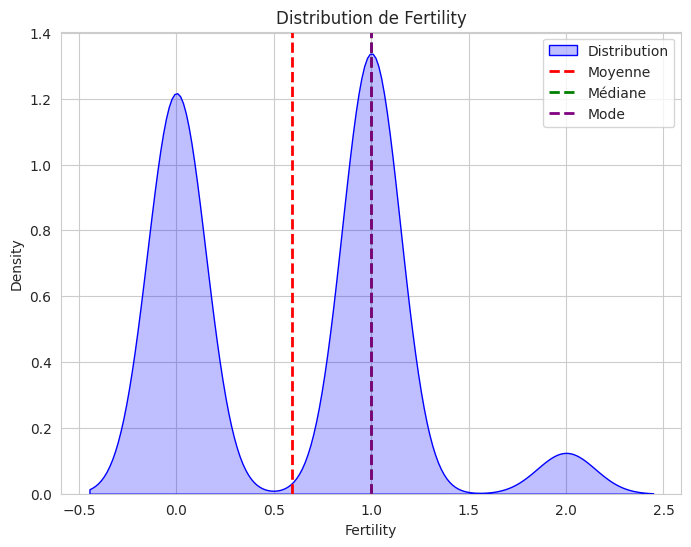

In [ ]:
def visualiser_symetrie(df):
    col = df.columns
    for i, c in enumerate(col):
        sns.set_style("whitegrid")
        plt.figure(figsize=(8, 6))
        sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")
        plt.axvline(np.mean(df[c]), color='red', linestyle='dashed', linewidth=2, label='Moyenne')
        plt.axvline(np.median(df[c]), color='green', linestyle='dashed', linewidth=2, label='Médiane')
        mode = round(df[c].mode().values[0],2)
        plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
        plt.legend()
        plt.title('Distribution de '+c)
        plt.show()

visualiser_symetrie(df)

Construire une boîte à moustache et afficher les données aberrantes.

In [ ]:
def generate_box_plot(data, attribute_name, show_outliers=True):
    #df[attribute_name] = df[attribute_name].fillna(df[attribute_name].median())
    fig, ax = plt.subplots()
    if show_outliers:
        ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(data, vert=True, patch_artist=True, labels=[attribute_name], showfliers=False)
    plt.title(f"Boîte à Moustache de {attribute_name}")
    plt.grid(True)
    plt.show()


In [ ]:
df_cleaned = df.dropna(subset=['P', 'OC', 'Cu'])

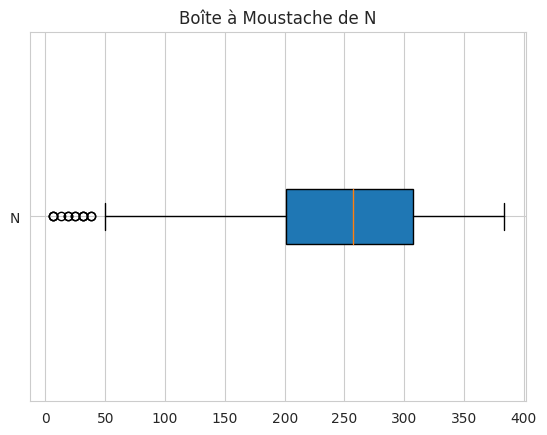

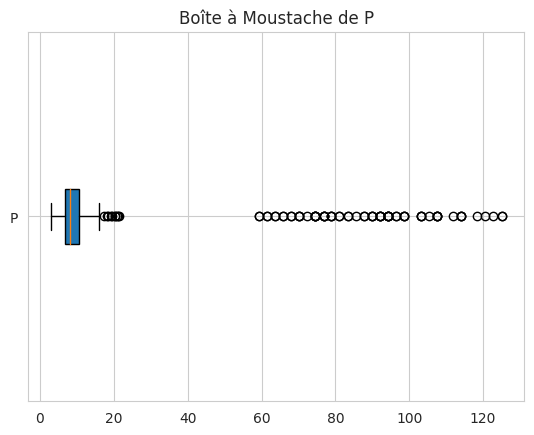

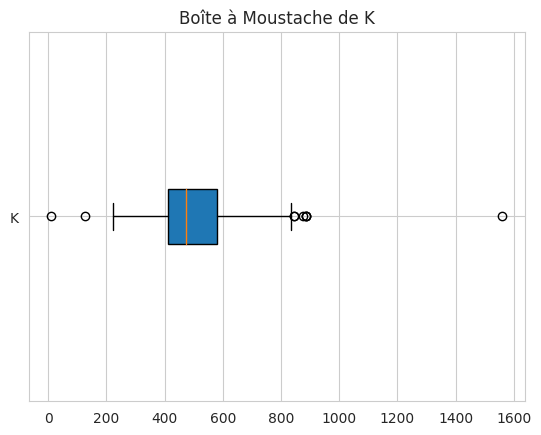

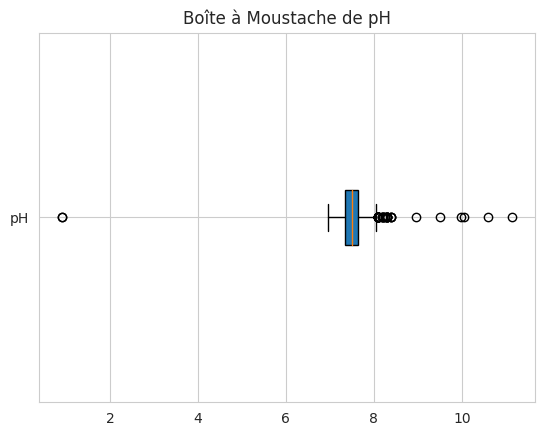

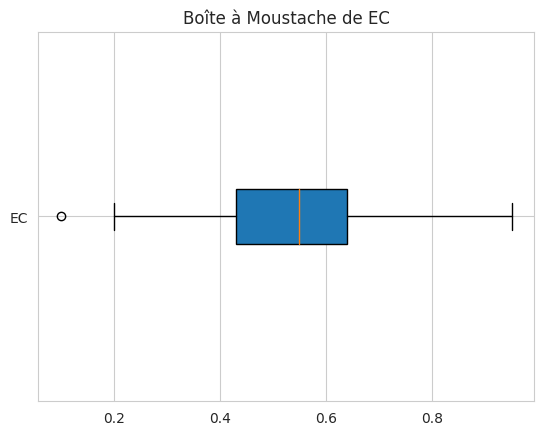

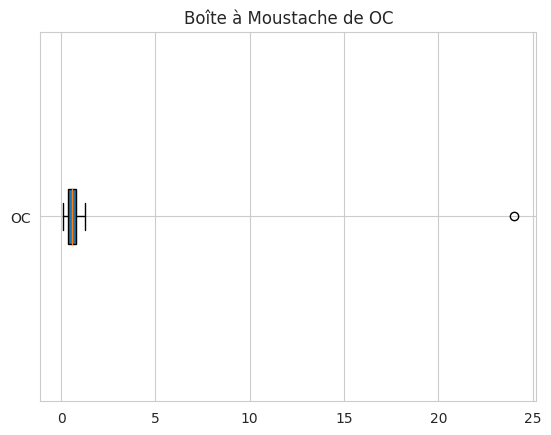

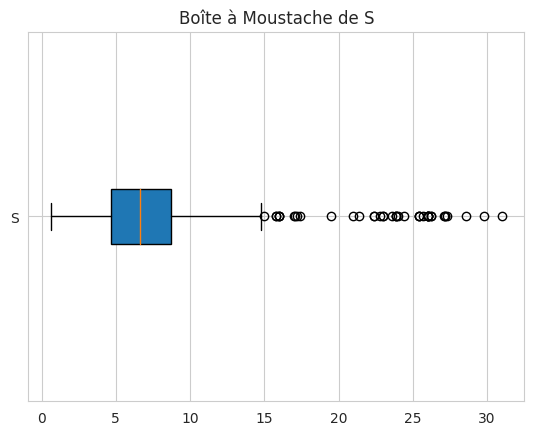

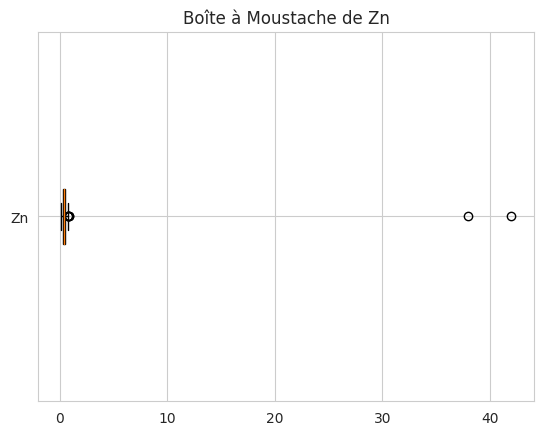

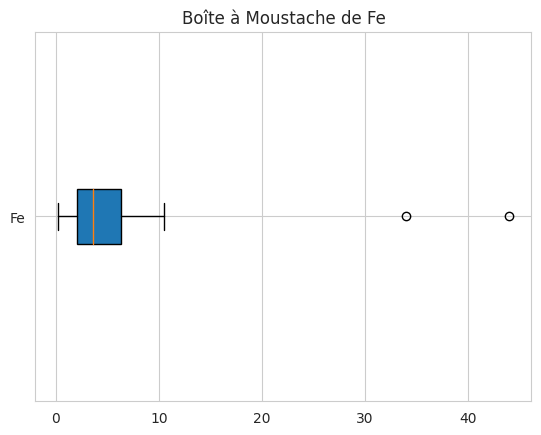

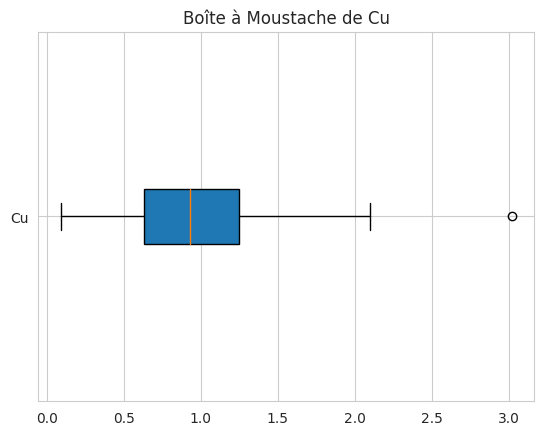

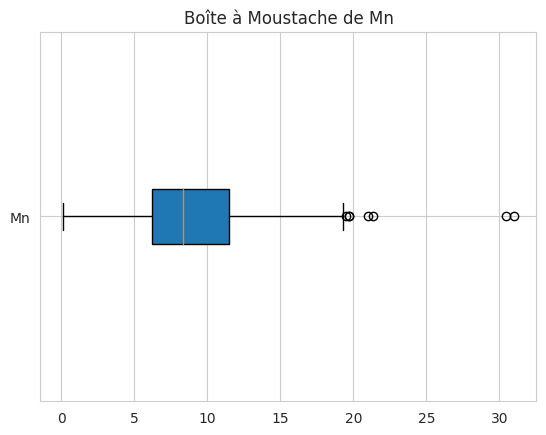

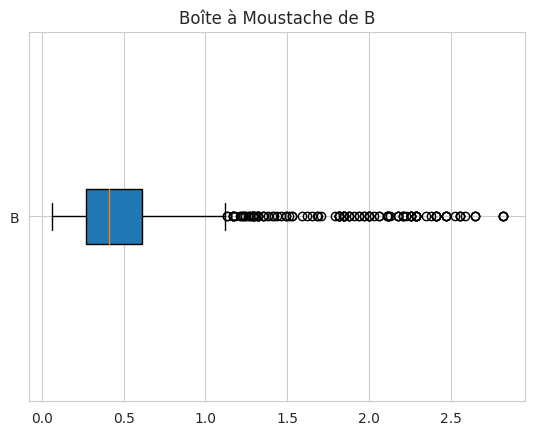

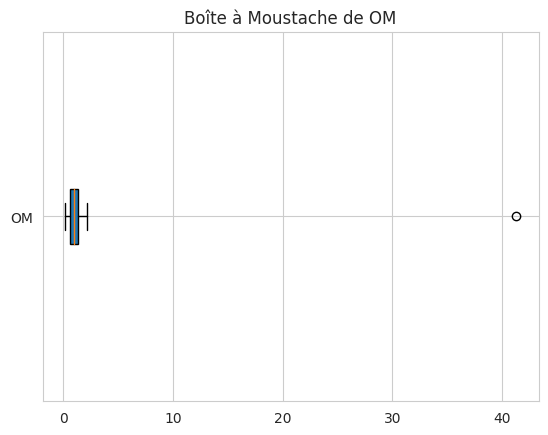

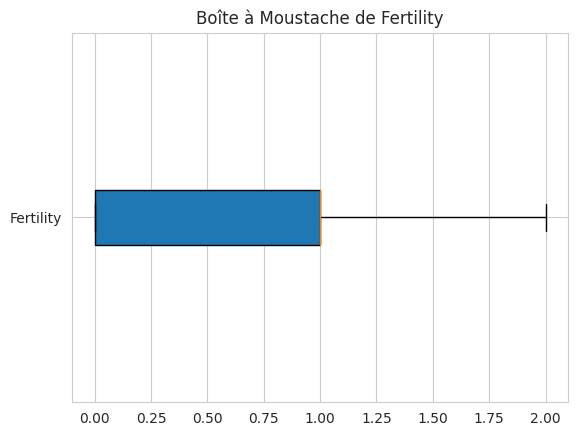

In [ ]:
col = df.columns
for c in col:
    generate_box_plot(df_cleaned[c], c, show_outliers=True)


Construire un histogramme et visualiser la distribution des données

In [ ]:
def hist(c):
    plt.hist(df[c], bins=10, edgecolor='k', alpha=0.75)
    plt.xlabel('Dimentions')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.title('Histogramme des '+c)
    plt.show()

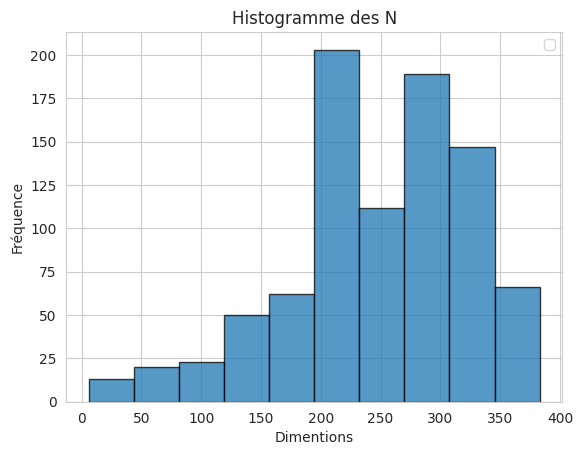

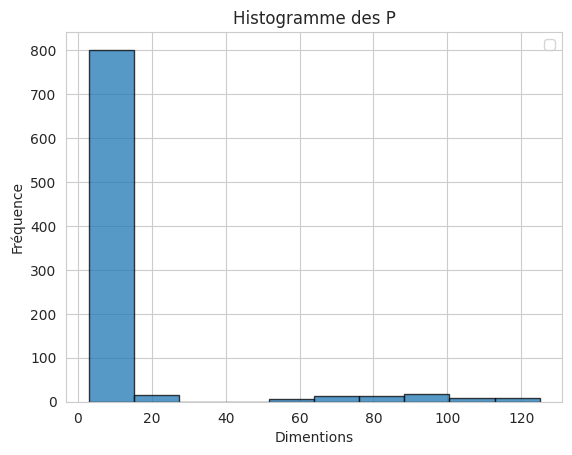

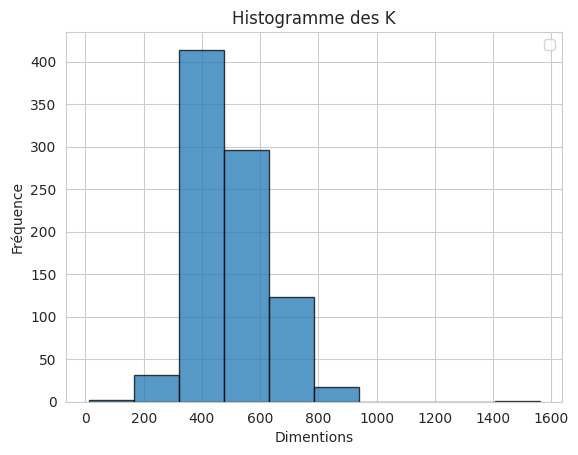

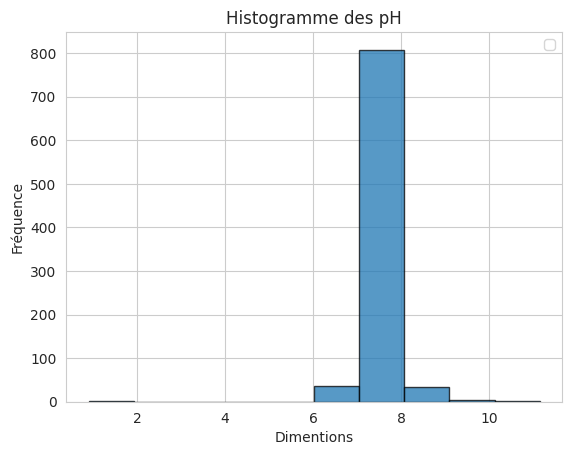

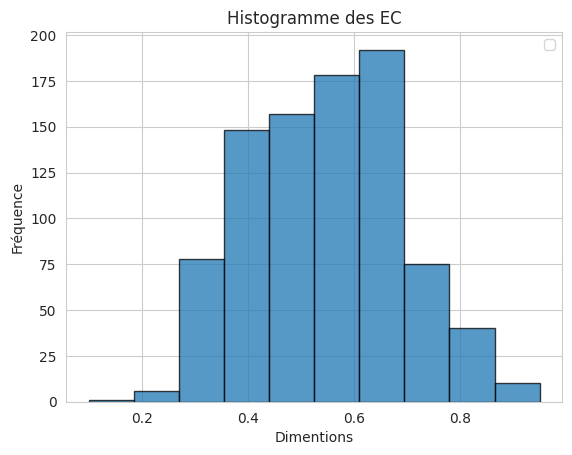

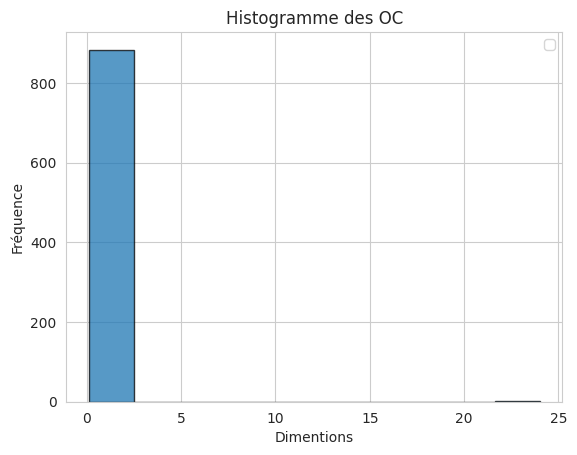

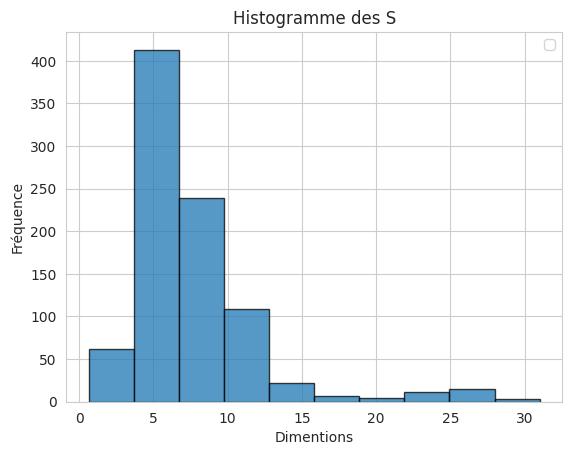

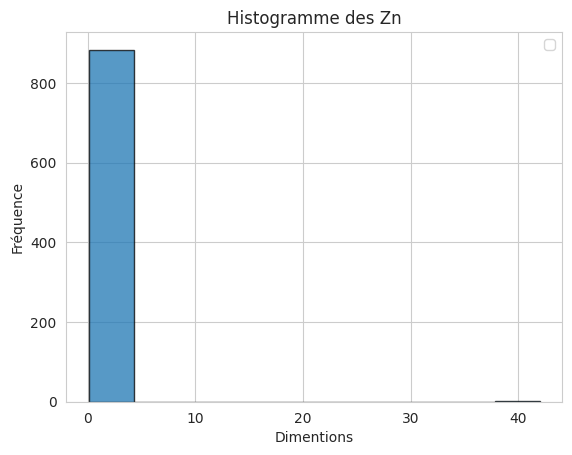

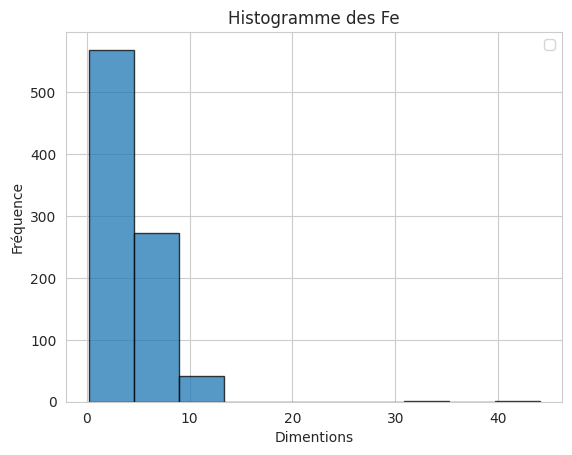

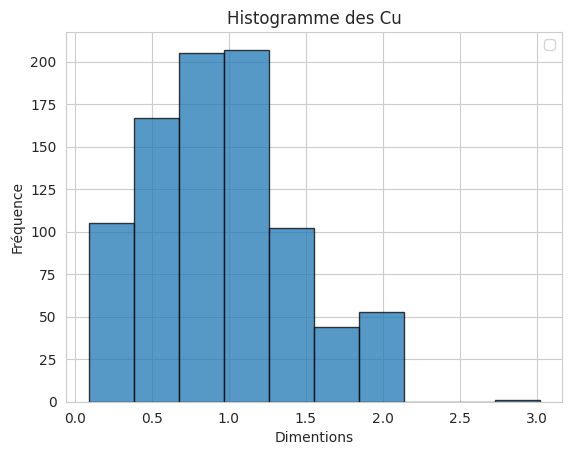

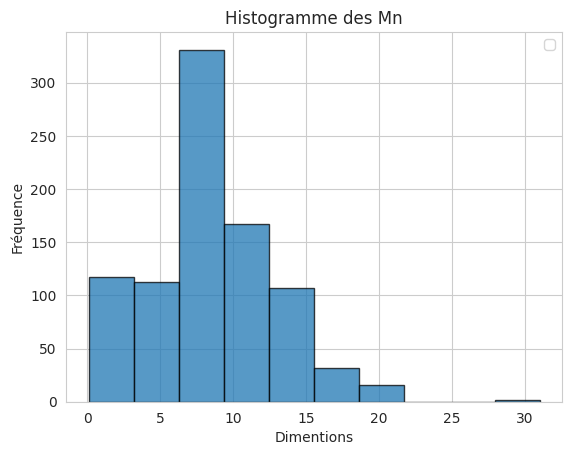

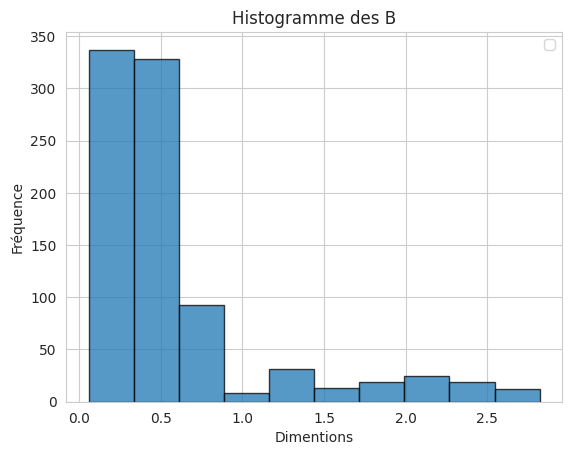

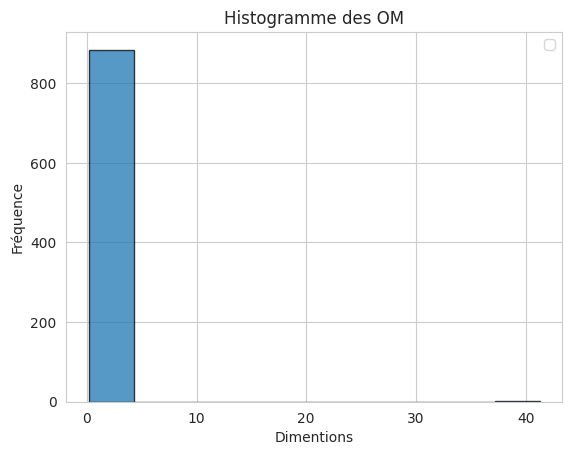

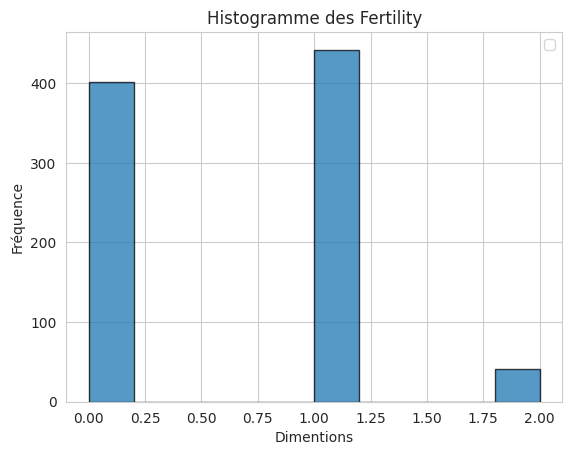

In [ ]:
for c in col:
    hist(c)

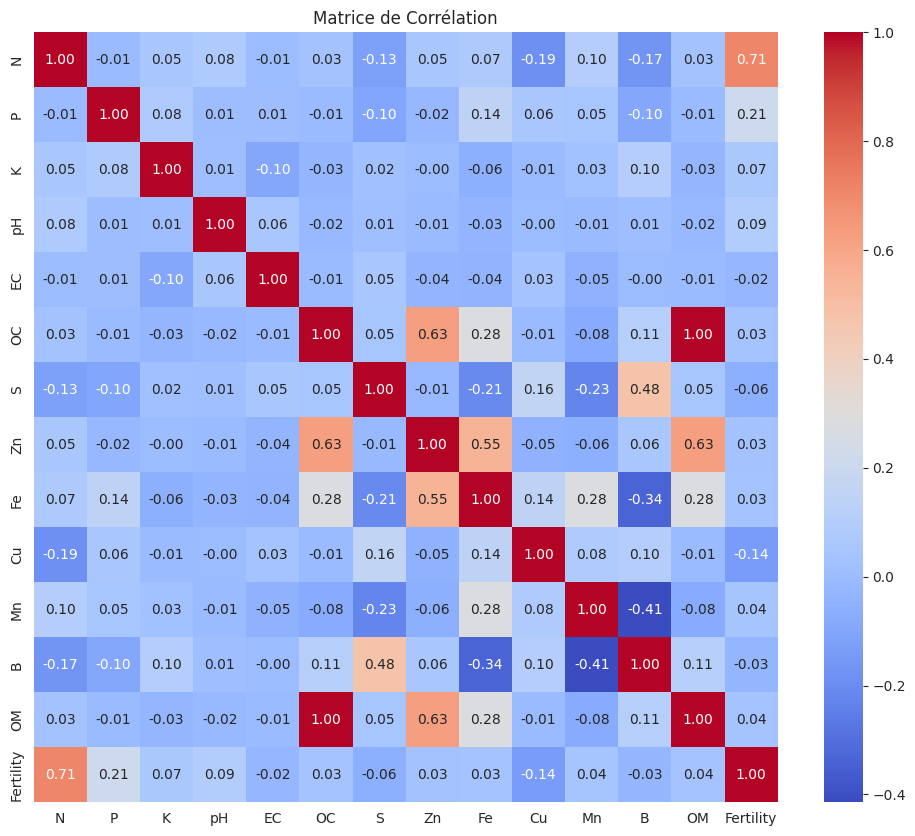

'\nLes valeurs plus proches de 1 ou -1 indiquent une corrélation forte,\ntandis que les valeurs proches de 0 indiquent une corrélation faible.\n'

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()
'''
Les valeurs plus proches de 1 ou -1 indiquent une corrélation forte,
tandis que les valeurs proches de 0 indiquent une corrélation faible.
'''

cas correlation positive

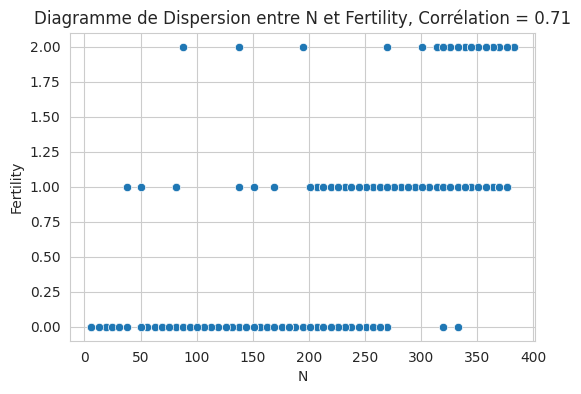

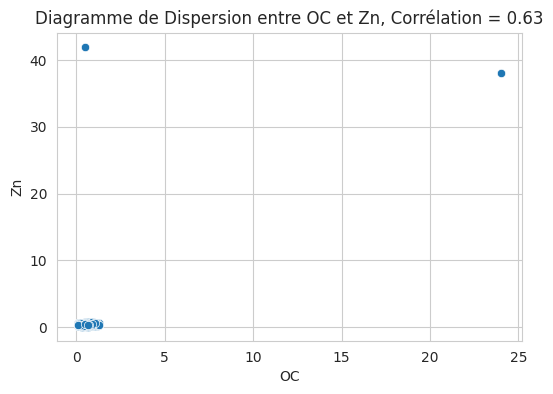

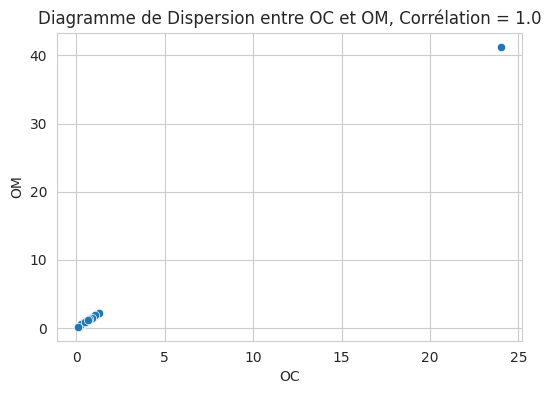

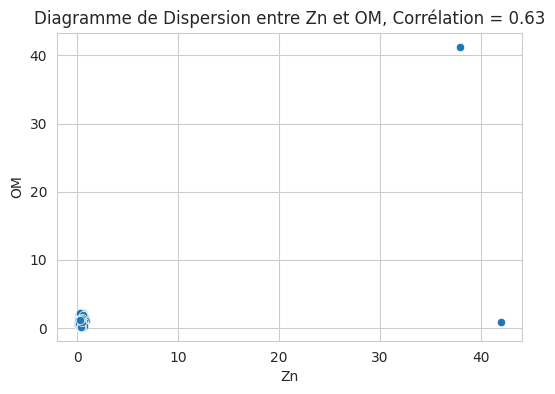

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# Assurez-vous que vous avez calculé la matrice de corrélation
correlation_matrix = df.corr()

# Spécifiez un seuil de corrélation positive (par exemple, 0.3 pour une corrélation positive forte)
positive_threshold = 0.6

# Créer une liste de paires d'attributs avec une corrélation positive supérieure au seuil
positive_correlation_pairs = []
for i, attribute1 in enumerate(df.columns):
    for j in range(i + 1, len(df.columns)):
        attribute2 = df.columns[j]
        correlation = correlation_matrix.loc[attribute1, attribute2]
        if correlation > positive_threshold:
            positive_correlation_pairs.append((attribute1, attribute2))

# Créer des diagrammes de dispersion pour les paires d'attributs ayant une corrélation positive supérieure au seuil
for attribute1, attribute2 in positive_correlation_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=attribute1, y=attribute2)
    plt.title(f'Diagramme de Dispersion entre {attribute1} et {attribute2}, Corrélation = {round(correlation_matrix.loc[attribute1, attribute2], 2)}')
    plt.show()


cas negative correlation

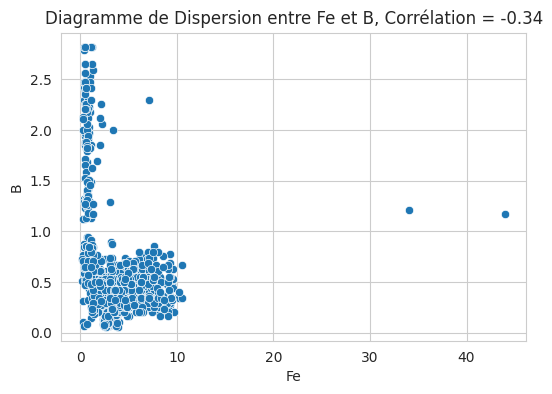

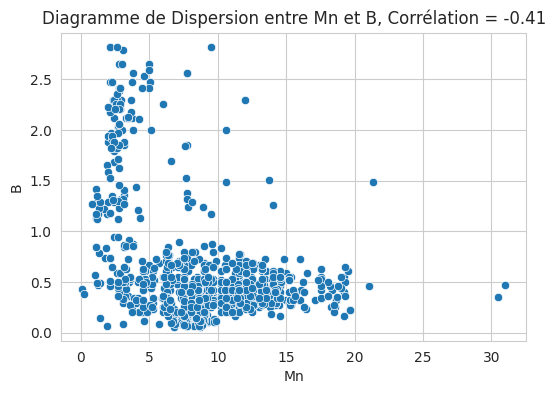

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# Assurez-vous que vous avez calculé la matrice de corrélation
correlation_matrix = df.corr()

# Spécifiez un seuil de corrélation négative (par exemple, -0.3 pour une corrélation négative forte)
negative_threshold = -0.3

# Créer une liste de paires d'attributs avec une corrélation négative inférieure au seuil
negative_correlation_pairs = []
for i, attribute1 in enumerate(df.columns):
    for j in range(i + 1, len(df.columns)):
        attribute2 = df.columns[j]
        correlation = correlation_matrix.loc[attribute1, attribute2]
        if correlation < negative_threshold:
            negative_correlation_pairs.append((attribute1, attribute2))

# Créer des diagrammes de dispersion pour les paires d'attributs ayant une corrélation négative inférieure au seuil
for attribute1, attribute2 in negative_correlation_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=attribute1, y=attribute2)
    plt.title(f'Diagramme de Dispersion entre {attribute1} et {attribute2}, Corrélation = {round(correlation_matrix.loc[attribute1, attribute2],2)}')
    plt.show()


cas abscence de correlation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# Assurez-vous que vous avez calculé la matrice de corrélation
correlation_matrix = df.corr()

# Spécifiez un seuil très bas pour considérer une corrélation comme "proche de zéro"
zero_correlation_threshold = 0.1  # Choisissez un seuil approprié

# Créer une liste de paires d'attributs avec une corrélation proche de zéro
zero_correlation_pairs = []
for i, attribute1 in enumerate(df.columns):
    for j in range(i + 1, len(df.columns)):
        attribute2 = df.columns[j]
        correlation = abs(correlation_matrix.loc[attribute1, attribute2])
        if correlation < zero_correlation_threshold:
            zero_correlation_pairs.append((attribute1, attribute2))

# Créer des diagrammes de dispersion pour les paires d'attributs ayant une corrélation proche de zéro
for attribute1, attribute2 in zero_correlation_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=attribute1, y=attribute2)
    plt.title(f'Diagramme de Dispersion entre {attribute1} et {attribute2}, Corrélation = {round(correlation_matrix.loc[attribute1, attribute2],2)}')
    plt.show()


Prétraitement

Choix de la méthode de remplacement des valeurs manquantes.

In [ ]:
valeurs_nulles = df.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

N            0
P            2
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64

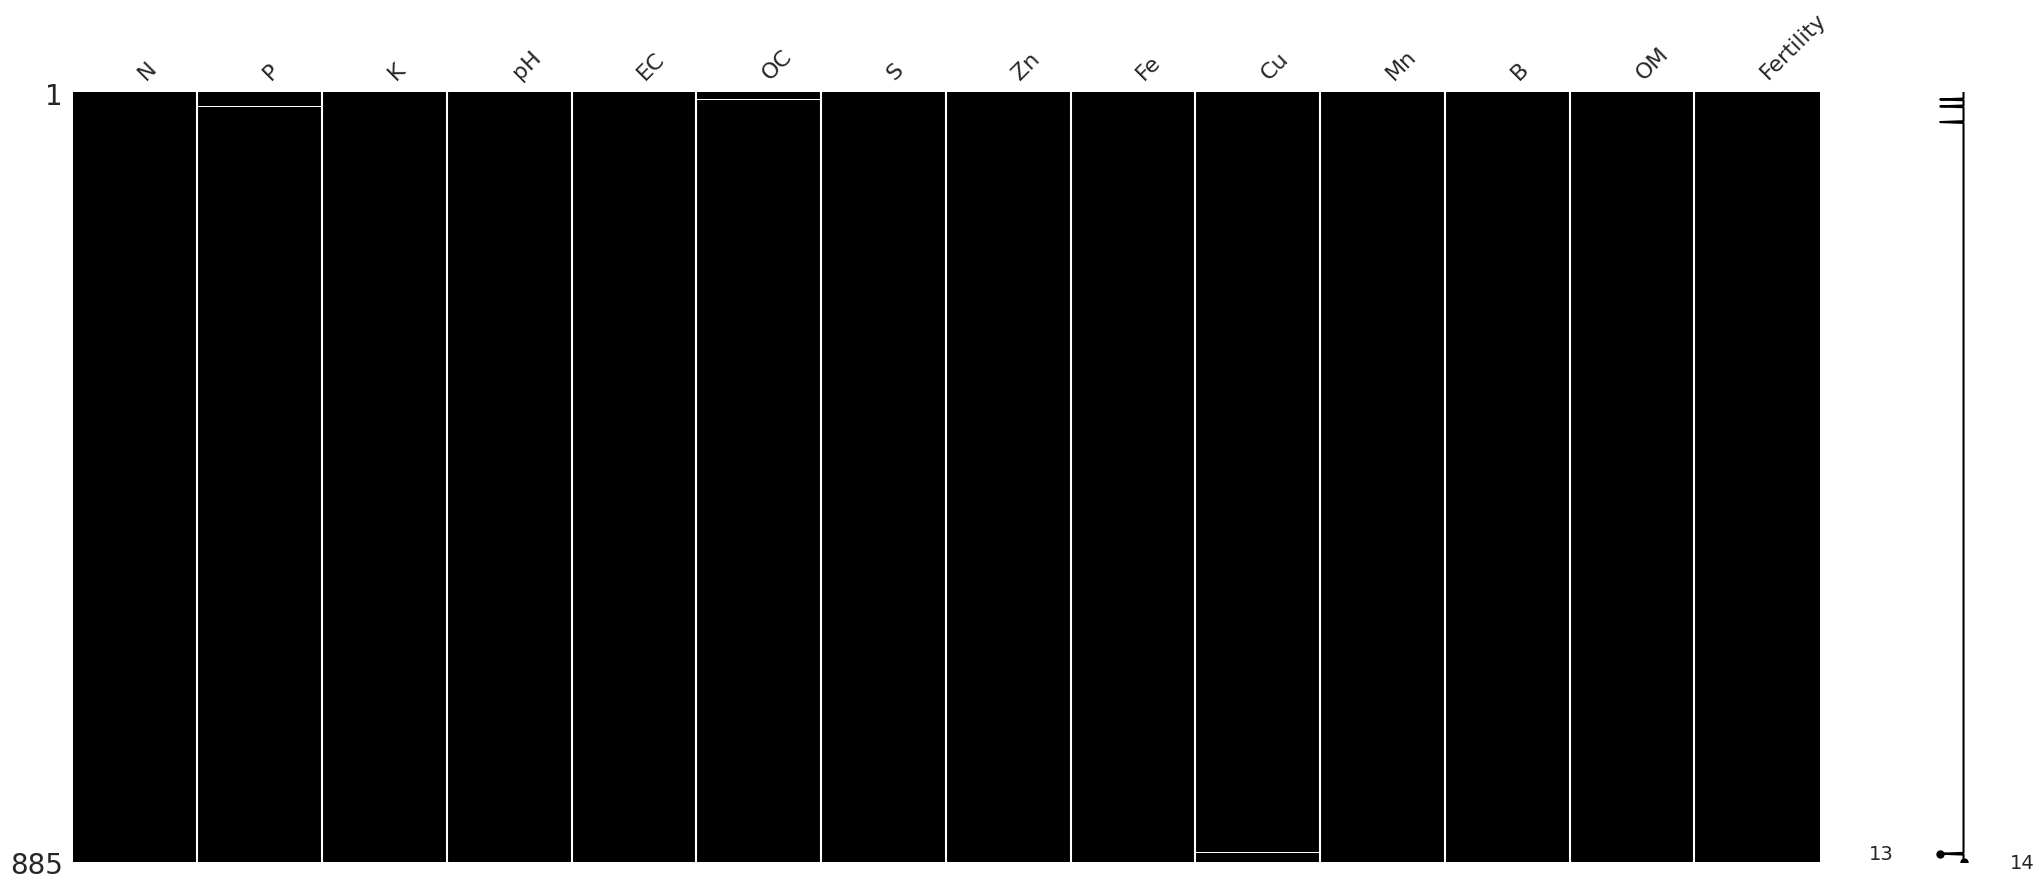

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd


# Utilisez la fonction matrix de missingno pour visualiser les valeurs manquantes
msno.matrix(df, color=(0,0,0))

# Affichez le graphique
plt.show()


In [ ]:
df_drp_nan = df.copy()

In [ ]:
def drop_nan(df_drp_nan):
    df_drp_nan = df_drp_nan.dropna(subset=['P'])
    df_drp_nan = df_drp_nan.dropna(subset=['OC'])
    df_drp_nan = df_drp_nan.dropna(subset=['Cu'])
    return df_drp_nan
df_drp_nan = drop_nan(df_drp_nan)

In [ ]:
df_moy_nan = df.copy()

In [ ]:
def moy_nan(df_moy_nan):
    df_moy_nan['P'] = df_moy_nan['P'].fillna(df_moy_nan['P'].mean())
    df_moy_nan['OC'] = df_moy_nan['OC'].fillna(df_moy_nan['OC'].mean())
    df_moy_nan['Cu'] = df_moy_nan['Cu'].fillna(df_moy_nan['Cu'].mean())
    return df_moy_nan

df_moy_nan = moy_nan(df_moy_nan)


In [ ]:
df_med_nan = df.copy()

In [ ]:
def moy_nan(df_med_nan):
    df_med_nan['P'] = df_med_nan['P'].fillna(df_med_nan['P'].median())
    df_med_nan['OC'] = df_med_nan['OC'].fillna(df_med_nan['OC'].median())
    df_med_nan['Cu'] = df_med_nan['Cu'].fillna(df_med_nan['Cu'].median())
    return df_moy_nan

df_moy_nan = moy_nan(df_moy_nan)


Le traitement des valeurs aberrantes

Remplacement par la médiane ou la moyenne:

In [ ]:
dfMoy = df_moy_nan.copy()
dfMed = df_moy_nan.copy()

In [ ]:
def remove_outliers_mean(dfMoy, column_name):
    # Extraction de la colonne spécifiée
    column_data = dfMoy[column_name]

    # Calcul de la moyenne et de l'écart type de la colonne
    mean_value = column_data.mean()

    # Définition des seuils pour les valeurs aberrantes
    q0, q1, q2, q3, q4 = calculer_quartiles(column_data)
    iqr = q3 - q1
    mn = q1 - (1.5 * iqr)
    mx = q3 + (1.5 * iqr)

    # Remplacement des valeurs aberrantes par la moyenne
    dfMoy[column_name] = np.where((dfMoy[column_name] < mn) | (dfMoy[column_name] > mx), mean_value, dfMoy[column_name])

In [ ]:
col = df.columns

In [ ]:
for c in col:
    remove_outliers_mean(dfMoy, c)

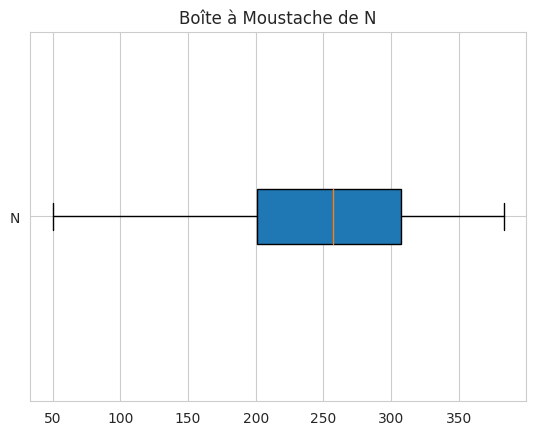

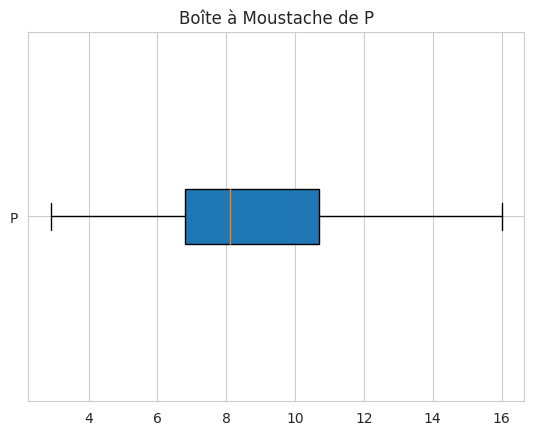

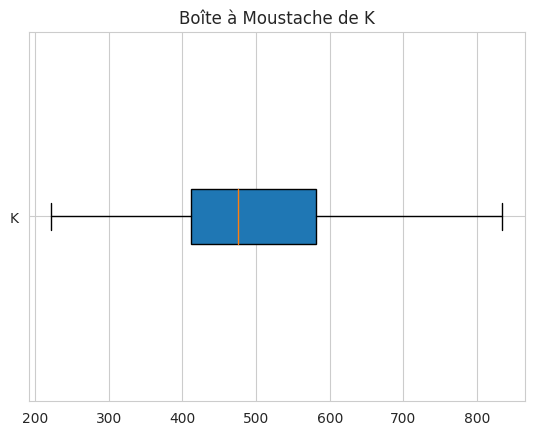

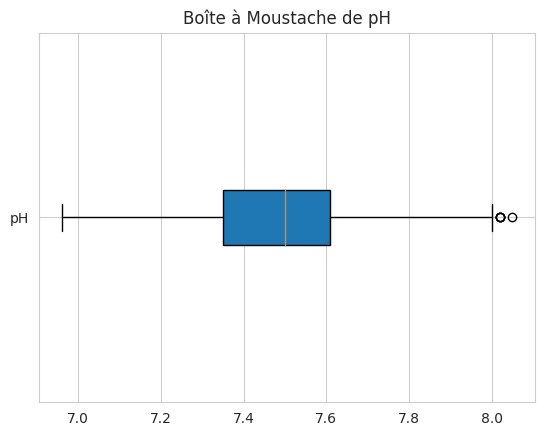

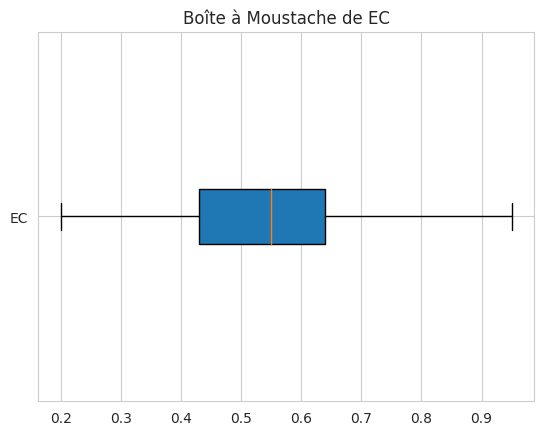

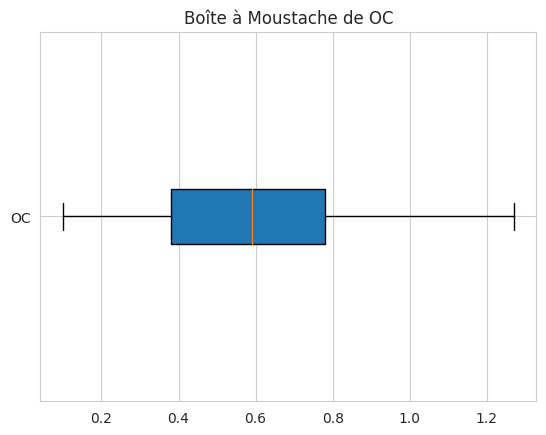

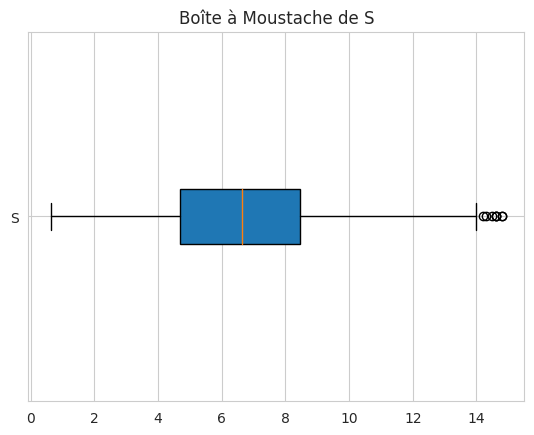

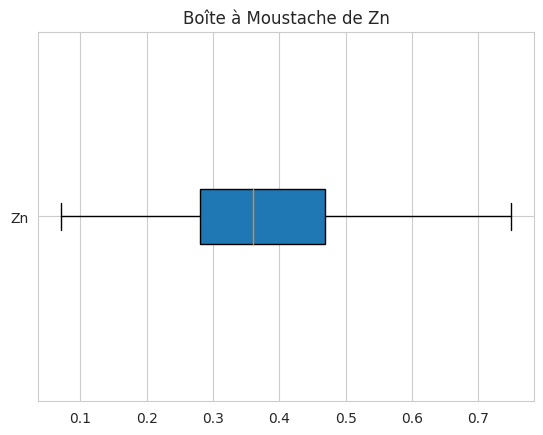

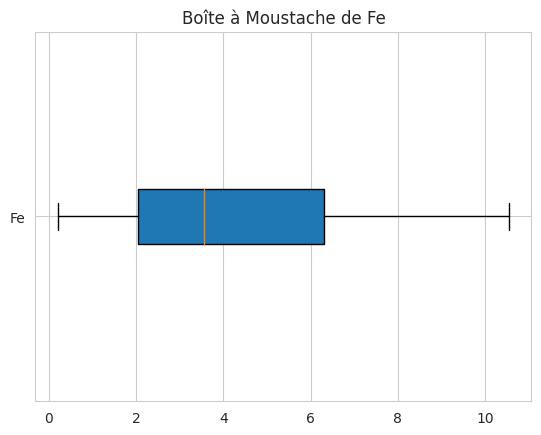

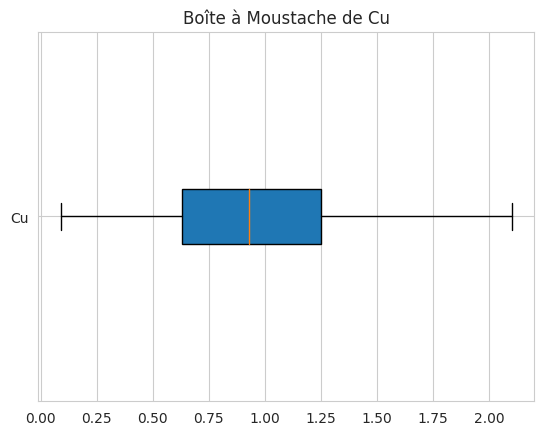

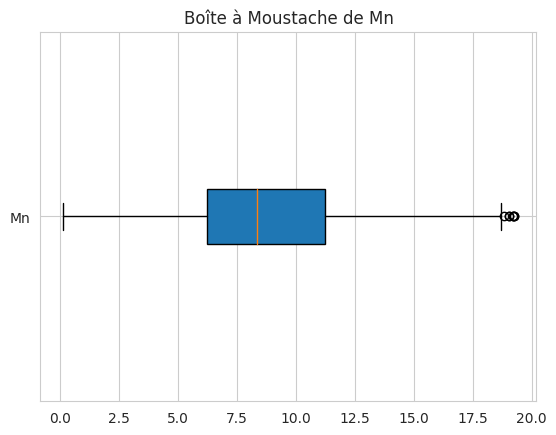

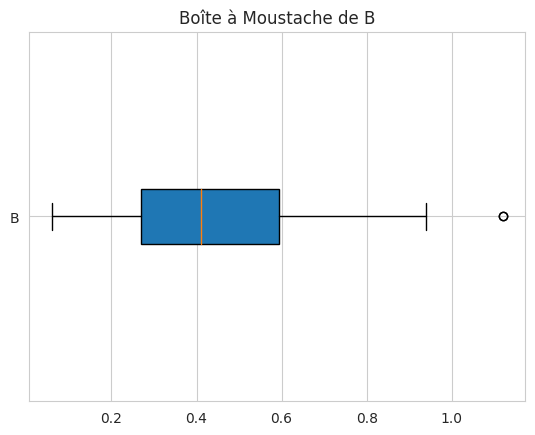

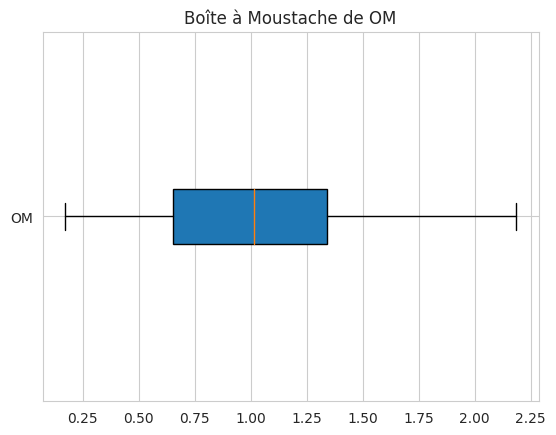

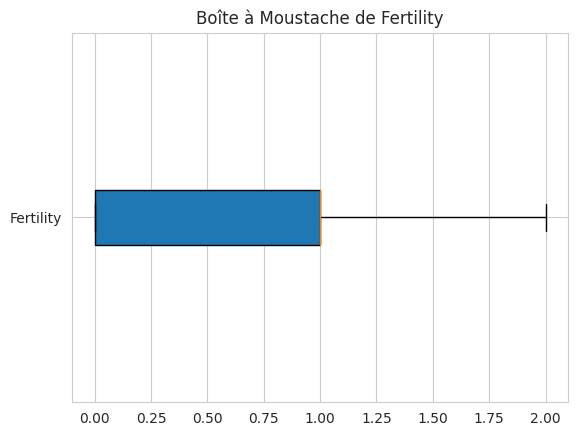

In [ ]:
for c in col:
    generate_box_plot(dfMoy[c], c, show_outliers=True)

In [ ]:
def remove_outliers_median(dfMed, column_name):
    # Extraction de la colonne spécifiée
    column_data = dfMed[column_name]

    # Calcul de la moyenne et de l'écart type de la colonne

    # Définition des seuils pour les valeurs aberrantes
    q0, q1, median_value, q3, q4 = calculer_quartiles(column_data)
    iqr = q3 - q1
    mn = q1 - (1.5 * iqr)
    mx = q3 + (1.5 * iqr)

    # Remplacement des valeurs aberrantes par la median
    dfMed[column_name] = np.where((dfMed[column_name] < mn) | (dfMed[column_name] > mx), median_value, dfMed[column_name])

In [ ]:
for c in col:
    remove_outliers_median(dfMed, c)

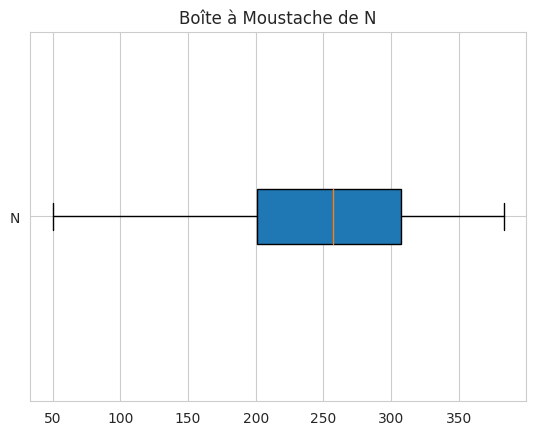

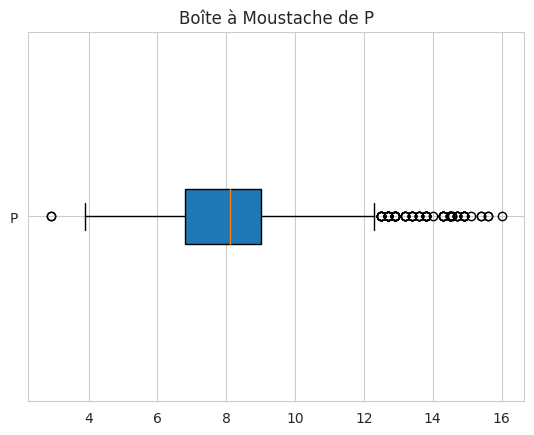

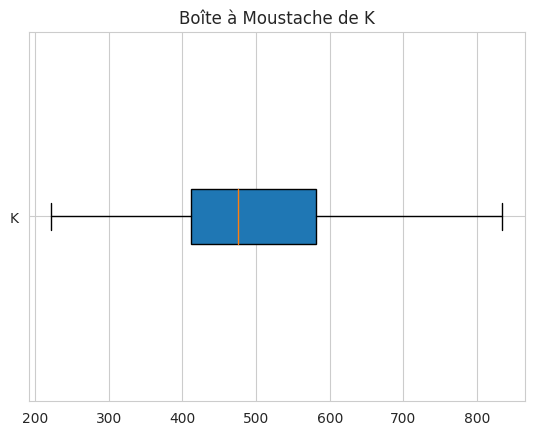

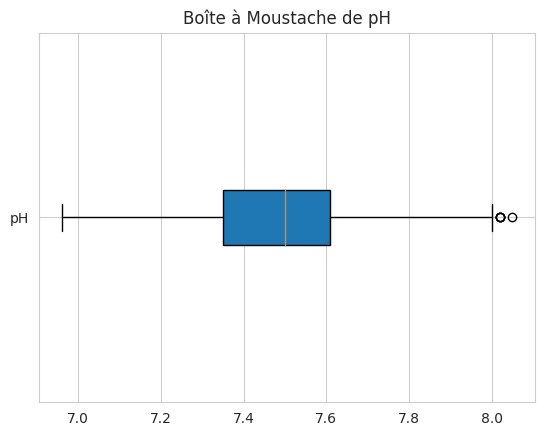

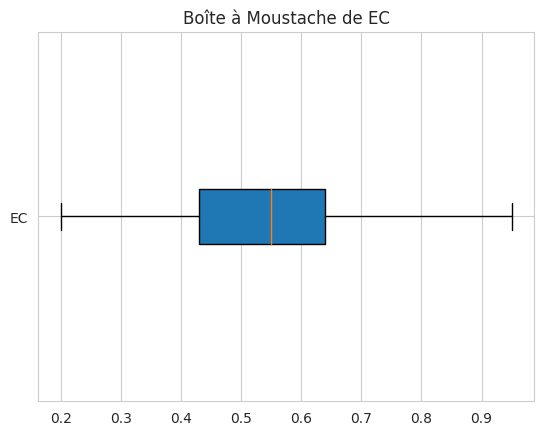

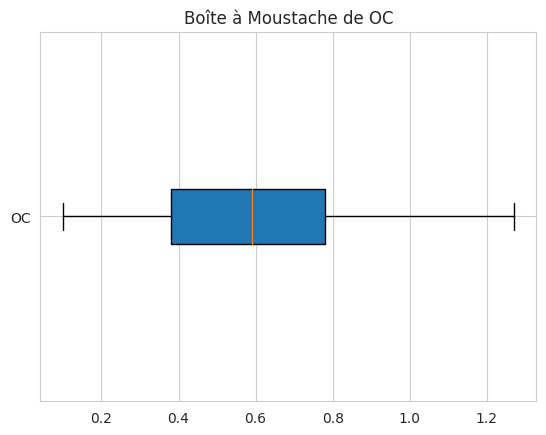

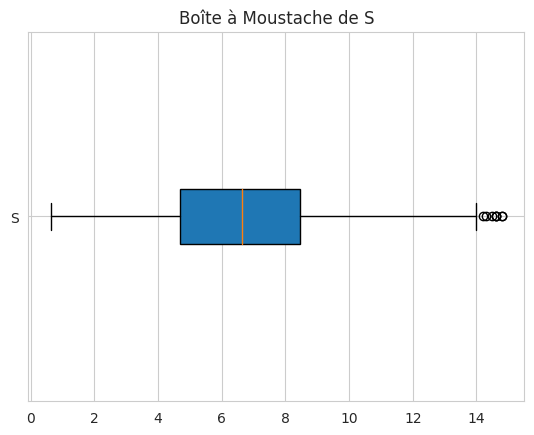

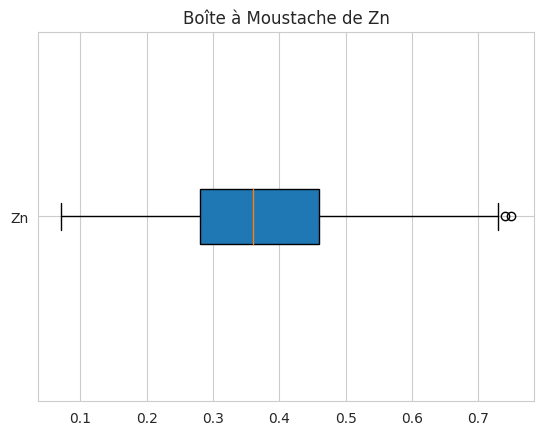

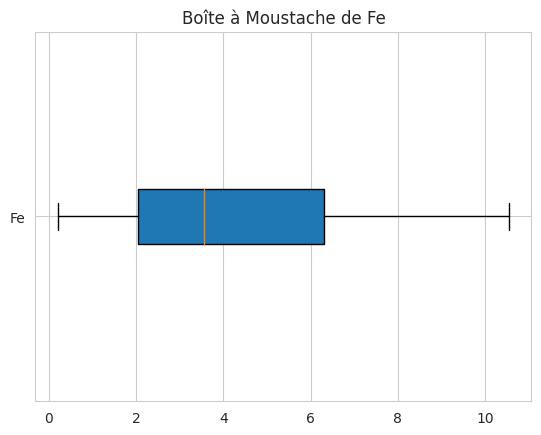

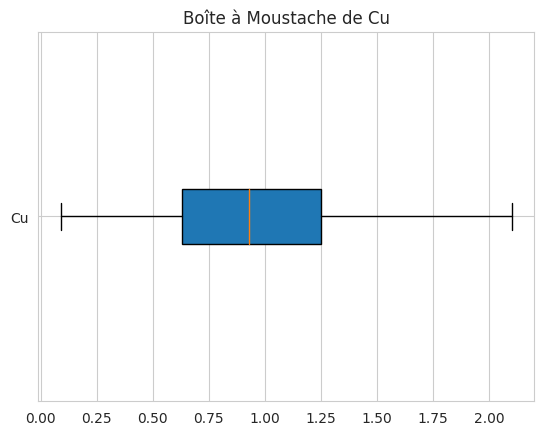

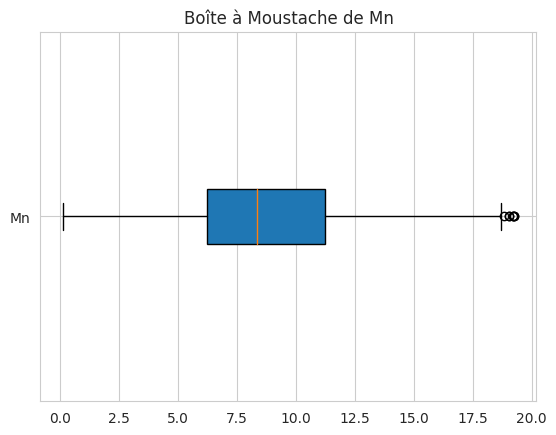

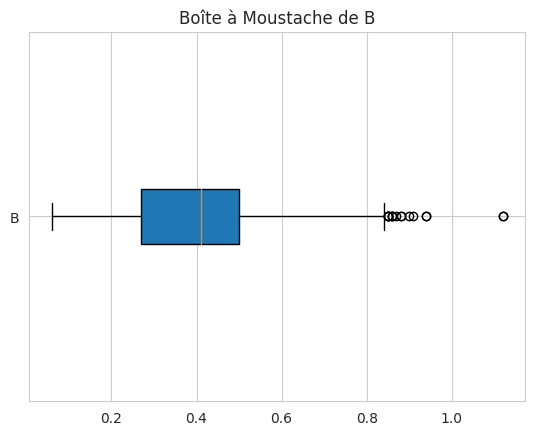

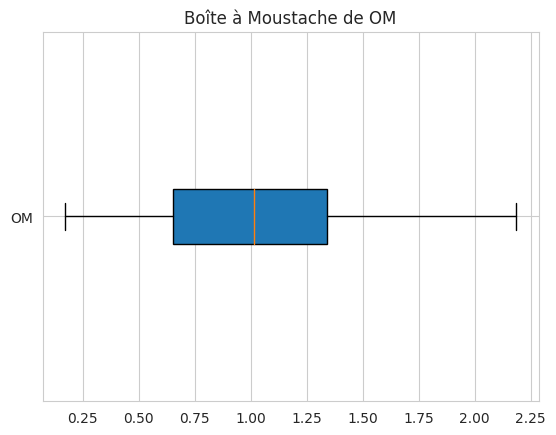

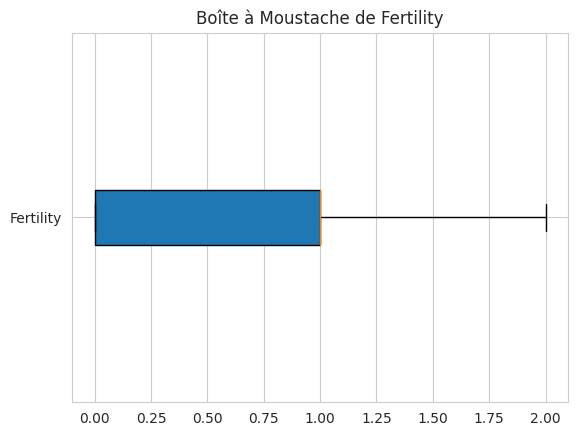

In [ ]:
for c in col:
    generate_box_plot(dfMed[c], c, show_outliers=True)

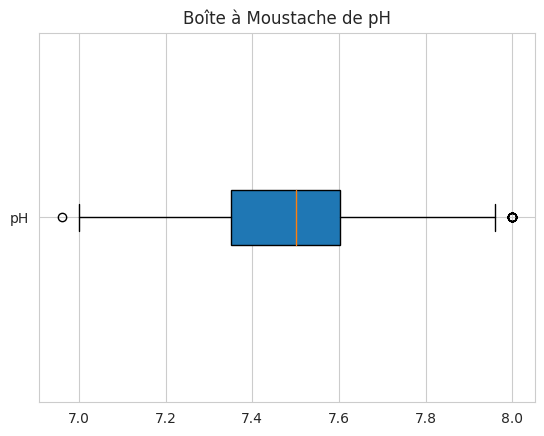

In [ ]:
q0, q1, q2, q3, q4 = calculer_quartiles(dfMoy['pH'])

iqr = q3 - q1
mn = q1 - (1.5 * iqr)
mx = q3 + (1.5 * iqr)
dfMoySupp = dfMoy[(dfMoy['pH']>=(mn)) & (dfMoy['pH']<=mx)]
generate_box_plot(dfMoySupp['pH'], 'pH', show_outliers=True)

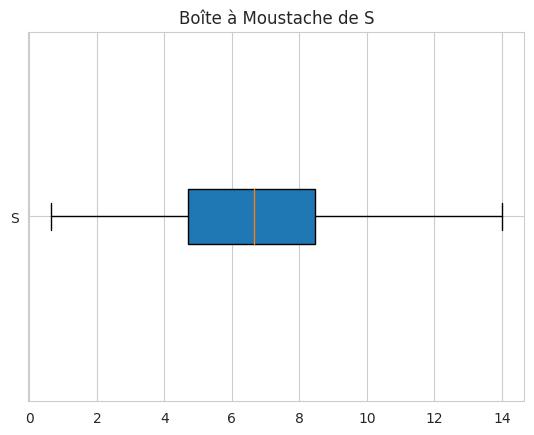

In [ ]:
q0, q1, q2, q3, q4 = calculer_quartiles(dfMoy['S'])

iqr = q3 - q1
mn = q1 - (1.5 * iqr)
mx = q3 + (1.5 * iqr)
dfMoySupp = dfMoy[(dfMoy['S']>=(mn)) & (dfMoy['S']<=mx)]
generate_box_plot(dfMoySupp['S'], 'S', show_outliers=True)

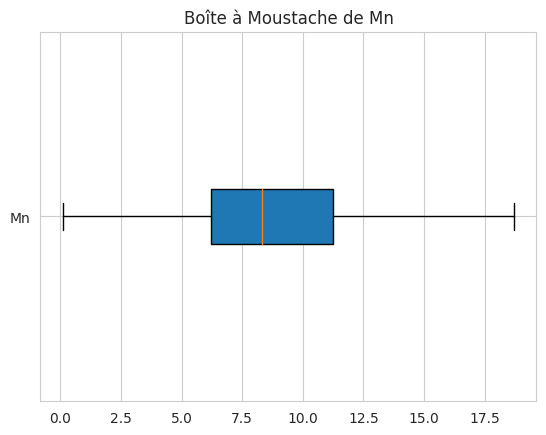

In [ ]:
q0, q1, q2, q3, q4 = calculer_quartiles(dfMoy['Mn'])

iqr = q3 - q1
mn = q1 - (1.5 * iqr)
mx = q3 + (1.5 * iqr)
dfMoySupp = dfMoy[(dfMoy['Mn']>=(mn)) & (dfMoy['Mn']<=mx)]
generate_box_plot(dfMoySupp['Mn'], 'Mn', show_outliers=True)

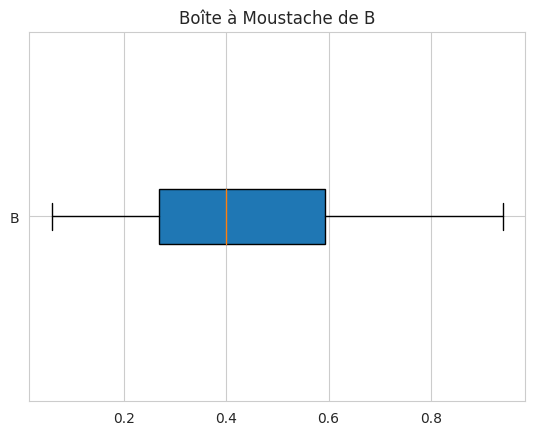

In [ ]:
q0, q1, q2, q3, q4 = calculer_quartiles(dfMoy['B'])

iqr = q3 - q1
mn = q1 - (1.5 * iqr)
mx = q3 + (1.5 * iqr)
dfMoySupp = dfMoy[(dfMoy['B']>=(mn)) & (dfMoy['B']<=mx)]
generate_box_plot(dfMoySupp['B'], 'B', show_outliers=True)

In [ ]:
df.shape

(885, 14)

In [ ]:
dfMoySupp.shape

(883, 14)

In [ ]:
NewData = dfMoySupp.copy()
NewData.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138.0,8.6,560.0,7.46,0.62,0.70,5.900000,0.24,0.31,0.77,8.71,0.110000,1.2040,0.0
1,213.0,7.5,338.0,7.62,0.75,1.06,7.545808,0.30,0.86,1.54,2.89,0.593424,1.8232,0.0
2,163.0,9.6,718.0,7.59,0.51,1.11,14.300000,0.30,0.86,1.57,2.70,0.593424,1.9092,0.0
3,157.0,6.8,475.0,7.64,0.58,0.94,7.545808,0.34,0.54,1.53,2.65,0.593424,1.6168,0.0
4,270.0,9.9,444.0,7.63,0.40,0.86,11.800000,0.25,0.76,1.69,2.43,0.593424,1.4792,1.0


Réduction des données (élimination des redondances) horizontales / verticales.

In [ ]:
def eliminer_redondance_colonnes(df):
    # Supprimer les colonnes redondantes (doublons)
    df_sans_redondance = df.T.drop_duplicates().T
    return df_sans_redondance

In [ ]:
dataSansRed1=eliminer_redondance_colonnes(NewData)
dataSansRed1.shape

(883, 14)

In [ ]:
def eliminer_redondance_lignes(df):
    # Supprimer les lignes redondantes (doublons)
    df_sans_redondance = df.drop_duplicates()
    return df_sans_redondance

In [ ]:
dataSansRed = eliminer_redondance_lignes(dataSansRed1)
dataSansRed.shape

(880, 14)

In [ ]:
dataSansRed.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138.0,8.6,560.0,7.46,0.62,0.70,5.900000,0.24,0.31,0.77,8.71,0.110000,1.2040,0.0
1,213.0,7.5,338.0,7.62,0.75,1.06,7.545808,0.30,0.86,1.54,2.89,0.593424,1.8232,0.0
2,163.0,9.6,718.0,7.59,0.51,1.11,14.300000,0.30,0.86,1.57,2.70,0.593424,1.9092,0.0
3,157.0,6.8,475.0,7.64,0.58,0.94,7.545808,0.34,0.54,1.53,2.65,0.593424,1.6168,0.0
4,270.0,9.9,444.0,7.63,0.40,0.86,11.800000,0.25,0.76,1.69,2.43,0.593424,1.4792,1.0


Normalisation des données :

Méthode Min-Max

In [ ]:
data1 = dataSansRed.copy()

In [ ]:
colonnes_a_normaliser = data1.columns
colonnes_a_normaliser = colonnes_a_normaliser[:-1]
min_old = data1[colonnes_a_normaliser].min()
max_old = data1[colonnes_a_normaliser].max()

In [ ]:
colonnes_a_normaliser

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'OM'],
      dtype='object')

In [ ]:
def normalizationMinMax(data, min_old, max_old, min_new, max_new):
    normalized_data = [(x - min_old) / (max_old - min_old) * (max_new - min_new) + min_new for x in data]
    return normalized_data

In [ ]:
for colonne in colonnes_a_normaliser:
    data1[colonne] = normalizationMinMax(data1[colonne], min_old[colonne], max_old[colonne], 0, 1)

In [ ]:
data1.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.264264,0.435115,0.552288,0.458716,0.560000,0.512821,0.371469,0.250000,0.009671,0.338308,0.449321,0.056818,0.512821,0.0
1,0.489489,0.351145,0.189542,0.605505,0.733333,0.820513,0.487698,0.338235,0.062863,0.721393,0.145246,0.606163,0.820513,0.0
2,0.339339,0.511450,0.810458,0.577982,0.413333,0.863248,0.964689,0.338235,0.062863,0.736318,0.135319,0.606163,0.863248,0.0
3,0.321321,0.297710,0.413399,0.623853,0.506667,0.717949,0.487698,0.397059,0.031915,0.716418,0.132706,0.606163,0.717949,0.0
4,0.660661,0.534351,0.362745,0.614679,0.266667,0.649573,0.788136,0.264706,0.053191,0.796020,0.121212,0.606163,0.649573,1.0


Méthode z-score

In [ ]:
data2 = dataSansRed.copy()

In [ ]:
def NormalizationZscore(data):
    moyenne = np.mean(data)
    ecart_type = np.std(data)
    donnees_normalisees = (data - moyenne) / ecart_type
    return donnees_normalisees

In [ ]:
for colonne in colonnes_a_normaliser:
    data2[colonne] = NormalizationZscore(data2[colonne])

In [ ]:
data2.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,-1.550435,-0.101278,0.522132,-0.101283,0.539284,0.365529,-0.348934,-1.150976,-1.440510,-0.395790,0.044050,-1.613802,0.362627,0.0
1,-0.512492,-0.474660,-1.354007,0.606085,1.462904,1.580578,0.294703,-0.647775,-1.229684,1.281176,-1.406952,0.954618,1.575063,0.0
2,-1.204454,0.238160,1.857402,0.473454,-0.242239,1.749335,2.936110,-0.647775,-1.229684,1.346512,-1.454321,0.954618,1.743457,0.0
3,-1.287489,-0.712267,-0.196210,0.694506,0.255094,1.175562,0.294703,-0.312307,-1.352346,1.259397,-1.466787,0.954618,1.170917,0.0
4,0.276345,0.339991,-0.458193,0.650296,-1.023763,0.905551,1.958418,-1.067109,-1.268016,1.607857,-1.521636,0.954618,0.901487,1.0


The finale data:

In [ ]:
dataFinale = data1.copy()